In [1]:
# Load libraries
import pgmpy as pg
import tabulate as tb
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Importing Library
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination

In [3]:
# Defining network structure

alarm_model = BayesianNetwork(
    [
        ("Burglary", "Alarm"),
        ("Earthquake", "Alarm"),
        ("Alarm", "JohnCalls"),
        ("Alarm", "MaryCalls"),
    ]
)

# Defining the parameters using CPT
from pgmpy.factors.discrete import TabularCPD

cpd_burglary = TabularCPD(
    variable="Burglary", variable_card=2, values=[[0.999], [0.001]]
)
cpd_earthquake = TabularCPD(
    variable="Earthquake", variable_card=2, values=[[0.998], [0.002]]
)
cpd_alarm = TabularCPD(
    variable="Alarm",
    variable_card=2,
    values=[[0.999, 0.71, 0.06, 0.05], [0.001, 0.29, 0.94, 0.95]],
    evidence=["Burglary", "Earthquake"],
    evidence_card=[2, 2],
)
cpd_johncalls = TabularCPD(
    variable="JohnCalls",
    variable_card=2,
    values=[[0.95, 0.1], [0.05, 0.9]],
    evidence=["Alarm"],
    evidence_card=[2],
)
cpd_marycalls = TabularCPD(
    variable="MaryCalls",
    variable_card=2,
    values=[[0.1, 0.7], [0.9, 0.3]],
    evidence=["Alarm"],
    evidence_card=[2],
)

# Associating the parameters with the model structure
alarm_model.add_cpds(
    cpd_burglary, cpd_earthquake, cpd_alarm, cpd_johncalls, cpd_marycalls
)

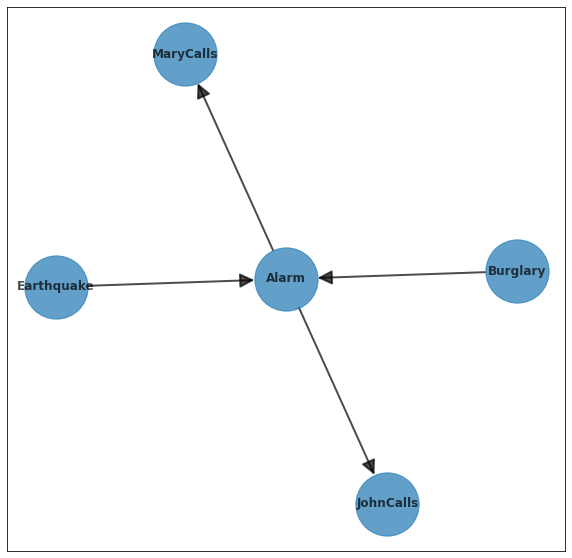

In [4]:
plt.figure(3,figsize=(10,10)) 
G = nx.DiGraph()
G.add_edges_from(alarm_model.edges)


G.add_nodes_from(alarm_model.nodes)

DAG = G.to_directed()
nx.topological_sort(DAG)

nx.draw_networkx(G,

                with_labels=True,
                arrowsize=30,
                node_size=4000,
                alpha=0.7,
                font_weight="bold",
                width=2.0)  # Draw the original graph

# sub_g = G.subgraph(nodes=['MET', 'HTT', 'RBW', 'RMIPS'])
# nx.draw(sub_g, pos=pos, with_labels=False, arrowsize=0, node_size=1400, alpha=0.7, font_weight="bold", node_color='#FFA500')  # Draw the original graph
plt.show()

In [5]:
print(f'Check model: {alarm_model.check_model()}\n')
for cpd in alarm_model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

Check model: True

CPT of Burglary:
+-------------+-------+
| Burglary(0) | 0.999 |
+-------------+-------+
| Burglary(1) | 0.001 |
+-------------+-------+ 

CPT of Earthquake:
+---------------+-------+
| Earthquake(0) | 0.998 |
+---------------+-------+
| Earthquake(1) | 0.002 |
+---------------+-------+ 

CPT of Alarm:
+------------+---------------+---------------+---------------+---------------+
| Burglary   | Burglary(0)   | Burglary(0)   | Burglary(1)   | Burglary(1)   |
+------------+---------------+---------------+---------------+---------------+
| Earthquake | Earthquake(0) | Earthquake(1) | Earthquake(0) | Earthquake(1) |
+------------+---------------+---------------+---------------+---------------+
| Alarm(0)   | 0.999         | 0.71          | 0.06          | 0.05          |
+------------+---------------+---------------+---------------+---------------+
| Alarm(1)   | 0.001         | 0.29          | 0.94          | 0.95          |
+------------+---------------+---------------

In [9]:
naive_model = BayesianNetwork(
    [
        ("Cause", "Effect 1"),
        ("Cause", "Effect 2"),
        ("Cause", "Effect 3"),
        ("Cause", "Effect 4"),
        ("Cause", "Effect 5"),
        ("Cause", "Effect 6"),
    ]
)

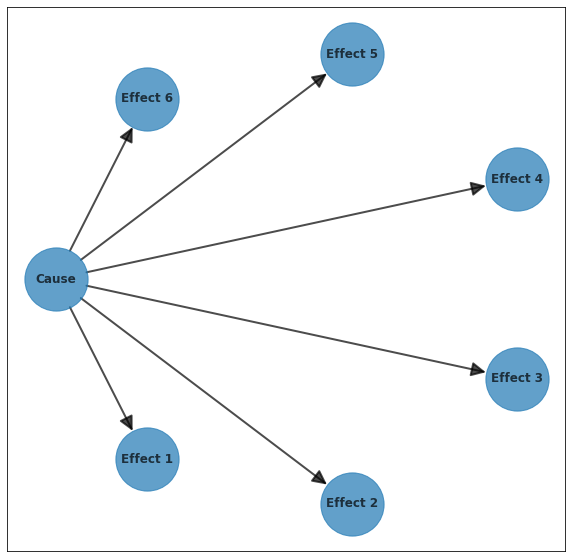

In [15]:
plt.figure(3,figsize=(10,10)) 
G = nx.DiGraph()
G.add_edges_from(naive_model.edges)


G.add_nodes_from(naive_model.nodes)

DAG = G.to_directed()
nx.topological_sort(DAG)
pos = nx.shell_layout(G)

                
nx.draw_networkx(G,
                pos=pos,
                with_labels=True,
                arrowsize=30,
                node_size=4000,
                alpha=0.7,
                font_weight="bold",
                width=2.0)  # Draw the original graph

# sub_g = G.subgraph(nodes=['MET', 'HTT', 'RBW', 'RMIPS'])
# nx.draw(sub_g, pos=pos, with_labels=False, arrowsize=0, node_size=1400, alpha=0.7, font_weight="bold", node_color='#FFA500')  # Draw the original graph
plt.show()